## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df = pd.read_csv('ab_data.csv')
df.head()

user_id                   timestamp      group landing_page  converted
0   851104  2017-01-21 22:11:48.556739    control     old_page          0
1   804228  2017-01-12 08:01:45.159739    control     old_page          0
2   661590  2017-01-11 16:55:06.154213  treatment     new_page          0
3   853541  2017-01-08 18:28:03.143765  treatment     new_page          0
4   864975  2017-01-21 01:52:26.210827    control     old_page          1

b. Use the below cell to find the number of rows in the dataset.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


c. The number of unique users in the dataset.

In [5]:
df.nunique()

user_id         290584
timestamp       294478
group                2
landing_page         2
converted            2
dtype: int64

d. The proportion of users converted.

In [6]:
df.converted.mean()

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't line up.

In [3]:
df[((df['landing_page'] == 'new_page') == (df['group'] == 'treatment')) == False].shape[0]

3893

f. Do any of the rows have missing values?

In [17]:
# there is no row with missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [27]:
df2 = df[((df['landing_page'] == 'new_page') == (df['group'] == 'treatment')) == True] 


In [28]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [6]:
df2.nunique()

user_id         290584
timestamp       290585
group                2
landing_page         2
converted            2
dtype: int64

b. There is one **user_id** repeated in **df2**.  What is it?

In [7]:
df2_userid = (df2.groupby('user_id').size().reset_index(name='counts'))
df2_userid[df2_userid.counts == 2]

user_id  counts
131712   773192       2

c. What is the row information for the repeat **user_id**? 

In [30]:
df2[df2.user_id == 773192]

user_id                   timestamp      group landing_page  converted
1899   773192  2017-01-09 05:37:58.781806  treatment     new_page          0
2893   773192  2017-01-14 02:55:59.590927  treatment     new_page          0

d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [31]:
df2.drop(df2.index[2893])

user_id                   timestamp      group landing_page  converted
0        851104  2017-01-21 22:11:48.556739    control     old_page          0
1        804228  2017-01-12 08:01:45.159739    control     old_page          0
2        661590  2017-01-11 16:55:06.154213  treatment     new_page          0
3        853541  2017-01-08 18:28:03.143765  treatment     new_page          0
4        864975  2017-01-21 01:52:26.210827    control     old_page          1
5        936923  2017-01-10 15:20:49.083499    control     old_page          0
6        679687  2017-01-19 03:26:46.940749  treatment     new_page          1
7        719014  2017-01-17 01:48:29.539573    control     old_page          0
8        817355  2017-01-04 17:58:08.979471  treatment     new_page          1
9        839785  2017-01-15 18:11:06.610965  treatment     new_page          1
10       929503  2017-01-18 05:37:11.527370  treatment     new_page          0
11       834487  2017-01-21 22:37:47.774891  treatment     new_page          0
12       803683  2017-01-09 06:05:16.222706  treatment     new_page          0
13       944475  2017-01-22 01:31:09.573836  treatment     new_page          0
14       718956  2017-01-22 11:45:11.327945  treatment     new_page          0
15       644214  2017-01-22 02:05:21.719434    control     old_page          1
16       847721  2017-01-17 14:01:00.090575    control     old_page          0
17       888545  2017-01-08 06:37:26.332945  treatment     new_page          1
18       650559  2017-01-24 11:55:51.084801    control     old_page          0
19       935734  2017-01-17 20:33:37.428378    control     old_page          0
20       740805  2017-01-12 18:59:45.453277  treatment     new_page          0
21       759875  2017-01-09 16:11:58.806110  treatment     new_page          0
23       793849  2017-01-23 22:36:10.742811  treatment     new_page          0
24       905617  2017-01-20 14:12:19.345499  treatment     new_page          0
25       746742  2017-01-23 11:38:29.592148    control     old_page          0
26       892356  2017-01-05 09:35:14.904865  treatment     new_page          1
27       773302  2017-01-12 08:29:49.810594  treatment     new_page          0
28       913579  2017-01-24 09:11:39.164256    control     old_page          1
29       736159  2017-01-06 01:50:21.318242  treatment     new_page          0
30       690284  2017-01-13 17:22:57.182769    control     old_page          0
...         ...                         ...        ...          ...        ...
294448   776137  2017-01-12 05:53:12.386730  treatment     new_page          0
294449   883344  2017-01-22 23:15:58.645325  treatment     new_page          0
294450   825594  2017-01-06 12:37:08.897784  treatment     new_page          0
294451   875688  2017-01-14 07:19:49.042869    control     old_page          0
294452   927527  2017-01-12 10:52:11.084740    control     old_page          0
294453   789177  2017-01-17 18:17:56.215378    control     old_page          0
294454   937338  2017-01-19 03:23:22.236666  treatment     new_page          0
294455   733101  2017-01-23 12:52:58.711914  treatment     new_page          0
294456   679096  2017-01-02 16:43:49.237940  treatment     new_page          0
294457   691699  2017-01-09 23:42:35.963486  treatment     new_page          0
294458   807595  2017-01-22 10:43:09.285426  treatment     new_page          0
294459   924816  2017-01-20 10:59:03.481635    control     old_page          0
294460   846225  2017-01-16 15:24:46.705903  treatment     new_page          0
294461   740310  2017-01-10 17:22:19.762612    control     old_page          0
294462   677163  2017-01-03 19:41:51.902148  treatment     new_page          0
294463   832080  2017-01-19 13:18:27.352570    control     old_page          0
294464   834362  2017-01-17 01:51:56.106436    control     old_page          0
294465   925675  2017-01-07 20:38:26.346410  treatment     new_page          0
294466   923948  2017-01-09 16:33:41.104573    control    

`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [56]:
df2.converted.mean()

0.11959667567149027

b. Given that an individual was in the `control` group, what is the probability they converted?

In [58]:
df2[df2.group == 'control'].converted.mean()

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [59]:
df2[df2.group == 'treatment'].converted.mean()

0.11880724790277405

d. What is the probability that an individual received the new page?

In [70]:
df2['landing_page'].value_counts()/df2['landing_page'].count()

new_page    0.500064
old_page    0.499936
Name: landing_page, dtype: float64

In [71]:
df2.groupby(['landing_page','group','converted']).size()

landing_page  group      converted
new_page      treatment  0            128047
                         1             17264
old_page      control    0            127785
                         1             17489
dtype: int64

e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

**No, I can't say that new treatment page leads to more conversions because we do not have sufficient evidence for the relation of conversion and landing page**

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

<table>
    <tr><th></th><th></th></tr>
    <tr>
        <td>$H_0$ (Null Hypothesis)</td>
        <td>$P_{old}$ >= $P_{new}$</td>
    </tr>
    <tr>
        <td>$H_1$ (Alternative Hypothesis)</td>
        <td>$P_{new}$ > $P_{old}$</td>
    </tr>
</table>

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [9]:
# as mentioned above p_new convert rate is equal to convert rate of ab_data.csv
p_new = df2.converted.mean()
p_new

0.11959667567149027

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [10]:
# as mentioned above p_old convert rate is equal to p_new convert rate
p_old = df2.converted.mean()
p_old

0.11959667567149027

c. What is $n_{new}$?

In [11]:
# the number of outcomes with new page
n_new = df2[df2.landing_page == 'new_page']['landing_page'].count()
n_new

145311

d. What is $n_{old}$?

In [12]:
# the number of outcomes with old page
n_old = df2[df2.landing_page == 'old_page']['landing_page'].count()
n_old

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [13]:
new_page_converted = np.random.choice([0,1], size=n_new, p=(p_new,1-p_new))
new_page_converted

array([1, 1, 1, ..., 1, 0, 1])

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [14]:
old_page_converted = np.random.choice([0,1], size=n_old, p=(p_old,1-p_old))
old_page_converted

array([1, 1, 1, ..., 1, 0, 1])

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [15]:
new_page_converted.mean(), old_page_converted.mean(), new_page_converted.mean()-old_page_converted.mean()

(0.8799058570927184, 0.8806118094084282, -0.00070595231570980133)

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [16]:
p_diffs = []
for _ in range(10000):
    new_page_converted = np.random.choice([0,1], size=n_new, p=(p_new,1-p_new))
    old_page_converted = np.random.choice([0,1], size=n_old, p=(p_old,1-p_old))
    p_diffs.append(new_page_converted.mean()-old_page_converted.mean())

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

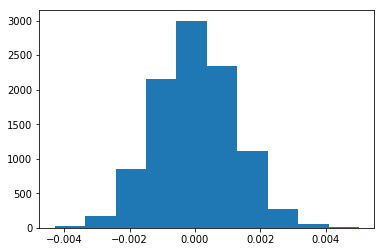

In [17]:
plt.hist(p_diffs);

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [18]:
convert_new = df2[(df2.converted == 1) & (df2.landing_page == 'new_page')]['user_id'].nunique()
convert_old = df2[(df2.converted == 1) & (df2.landing_page == 'old_page')]['user_id'].nunique()

cvt_new = float(convert_new)/ float(n_new) 
cvt_old = float(convert_old)/ float(n_old)

diff_cvt = cvt_new - cvt_old
diff_cvt

-0.0015790565976871451

In [19]:
(np.asarray(p_diffs)>diff_cvt).mean()

0.9042

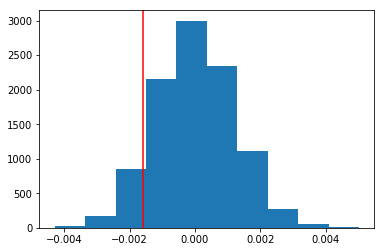

In [20]:
plt.hist(p_diffs);
plt.axvline(x=diff_cvt,color ='red');

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

** Type I error rate of 5%, and P_old > $\alpha$, we fail to reject the null .
 So, the data shows that, with a type I error rate of 0.05, the old page has higher probability of convert rate than new page.
 **

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [21]:
import statsmodels.api as sm

convert_old = df2[(df2.converted == 1) & (df2.landing_page == 'old_page')]['user_id'].nunique()
convert_new = df2[(df2.converted == 1) & (df2.landing_page == 'new_page')]['user_id'].nunique()
n_old = df2[(df2.landing_page == 'old_page')]['user_id'].count()
n_new = df2[(df2.landing_page == 'new_page')]['user_id'].count()

convert_old, convert_new, n_old, n_new

/Users/ozgurisilak/anaconda3/envs/my_env/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


(17489, 17264, 145274, 145311)

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [22]:
z_score, p_value = sm.stats.proportions_ztest([convert_new,convert_old],[n_new,n_old], alternative = 'larger')
z_score, p_value

(-1.3116075339133115, 0.90517370514059103)

In [23]:
from scipy.stats import norm

norm.ppf(1-(0.05/2))
# critical value at 95% confidence

1.959963984540054

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**Since the z-score of 1.311 does not exceed the critical value of 1.95996, we fail to reject the null hypothesis that old page users has a better or equal converted rate than new page users ($H_0$ (Null Hypothesis) $P_{old}$ >= $P_{new}$) <br>
Therefore, the converted rate for new page and old page have no difference. This result is the same as parts J. and K. result. 
**

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Since there is only 2 outcomes, Logistic regression should be used**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [33]:
# added intercept column
df2['intercept'] = 1

# created ab_page column by adding dummy variable only for treatment values
df2['ab_page'] = pd.get_dummies(df2['group'])['treatment']
df2.head()

/Users/ozgurisilak/anaconda3/envs/my_env/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/Users/ozgurisilak/anaconda3/envs/my_env/lib/python3.6/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


user_id                   timestamp      group landing_page  converted  \
0   851104  2017-01-21 22:11:48.556739    control     old_page          0   
1   804228  2017-01-12 08:01:45.159739    control     old_page          0   
2   661590  2017-01-11 16:55:06.154213  treatment     new_page          0   
3   853541  2017-01-08 18:28:03.143765  treatment     new_page          0   
4   864975  2017-01-21 01:52:26.210827    control     old_page          1   

   intercept  ab_page  
0          1        0  
1          1        0  
2          1        1  
3          1        1  
4          1        0

c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [45]:
#creating Logit regression model for converted variable with created columns
import scipy.stats

logreg = sm.Logit(df2['converted'], df2[['intercept','ab_page']])
results = logreg.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [49]:
# I have added this part because I have started receiving "module 'scipy.stats' has no attribute 'chisqprob'" error
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)

In [50]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290585
Model:                          Logit   Df Residuals:                   290583
Method:                           MLE   Df Model:                            1
Date:                Tue, 20 Mar 2018   Pseudo R-squ.:               8.085e-06
Time:                        20:01:28   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1897
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.312      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

- The p-value associated with ab_page is 0.190
- It differs from the p-value from Part II because the null and alternative hypotheses are different from each other. In logistic regression model;
    - $H_0$ (Null Hypothesis) $P_{old}$ = $P_{new}$
    - $H_1$ (Alternative Hypothesis) $P_{new}$ != $P_{old}$

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**Timestamp can be an other factor. It can help understanding conversion rate be affected on certain times of the day or even seasons or months. As for disadvantage to adding additional terms into the regression model, it would make the model complex. And if new variables are dependable then we would need to add higher order variables to help predicting more accurate.**

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [71]:
countries_df = pd.read_csv('./countries.csv')
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')

In [72]:
### Create the necessary dummy variables
countries_df.head()
df_new.head()
df_new['country'].value_counts() #CA, UK, US
df_new[['CA','UK','US']] = pd.get_dummies(df_new['country'])

In [73]:
df_new.head()

country                   timestamp      group landing_page  \
user_id                                                               
630000       US  2017-01-19 06:26:06.548941  treatment     new_page   
630001       US  2017-01-16 03:16:42.560309  treatment     new_page   
630002       US  2017-01-19 19:20:56.438330    control     old_page   
630003       US  2017-01-12 10:09:31.510471  treatment     new_page   
630004       US  2017-01-18 20:23:58.824994  treatment     new_page   

         converted  intercept  ab_page  CA  UK  US  
user_id                                             
630000           0          1        1   0   0   1  
630001           1          1        1   0   0   1  
630002           0          1        0   0   0   1  
630003           0          1        1   0   0   1  
630004           0          1        1   0   0   1

In [74]:
df_new['intercept'] = 1
logreg2 = sm.Logit(df_new['converted'], df_new[['intercept','US','UK']])
results2 = logreg2.fit()
results2.summary()

Optimization terminated successfully.
         Current function value: 0.366115
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290585
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            2
Date:                Wed, 21 Mar 2018   Pseudo R-squ.:               1.521e-05
Time:                        17:24:45   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1983
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0375      0.026    -78.364      0.000      -2.088      -1.987
US             0.0408      0.027      1.518      0.129      -0.012       0.093
UK             0.0507      0.028      1.786      0.074      -0.005       0.106
==============================================================================
"""

In [65]:
np.exp(0.0408), np.exp(0.0507)

(1.0416437559600236, 1.0520072437650141)

- For every unit increase for US, conversion is 4.2% more to happen holding all other variables constant 
- For every unit increase for UK, conversion is 5.2% more to happen holding all other variables constant 

** since p-value is greater than 0.05, the country variables are not statistically significant **

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [76]:
### Creating new columns for 
df_new.head()
df_new['US_newpage'] = df_new['US'] * df_new['ab_page']
df_new['UK_newpage'] = df_new['UK'] * df_new['ab_page']

logreg3 = sm.Logit(df_new['converted'], df_new[['intercept','ab_page','US_newpage','UK_newpage','US','UK']])
results3 = logreg3.fit()
results3.summary()

Optimization terminated successfully.
         Current function value: 0.366108
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290585
Model:                          Logit   Df Residuals:                   290579
Method:                           MLE   Df Model:                            5
Date:                Wed, 21 Mar 2018   Pseudo R-squ.:               3.483e-05
Time:                        17:26:36   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1918
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0040      0.036    -55.008      0.000      -2.075      -1.933
ab_page       -0.0674      0.052     -1.297      0.195      -0.169       0.034
US_newpage     0.0469      0.054      0.872      0.383      -0.059       0.152
UK_newpage     0.0783      0.057      1.378      0.168      -0.033       0.190
US             0.0175      0.038      0.465      0.642      -0.056       0.091
UK             0.0118      0.040      0.296      0.767      -0.066       0.090
==============================================================================
"""

In [78]:
np.exp(results3.params)

intercept     0.134794
ab_page       0.934776
US_newpage    1.047989
UK_newpage    1.081428
US            1.017682
UK            1.011854
dtype: float64

**According to last results; since p-value is greater than 0.05, adding interaction variables does not show significant change for converted. So, the country of user and the page user in is not statistically significant on converted**

- Converted is 1.08 times more likely to happen for UK and new page users holding all other varible constant.
- Converted is 1.04 times more likely to happen for US and new page users holding all other varible constant.
- Converted is 1.18 % more likely to happen for the users in UK, holding all other varible constant.
- Converted is 1.76 % more likely to happen for the users in US, holding all other varible constant.
 


<a id='conclusions'></a>
## Conclusions

Congratulations on completing the project! 

### Gather Submission Materials

Once you are satisfied with the status of your Notebook, you should save it in a format that will make it easy for others to read. You can use the __File -> Download as -> HTML (.html)__ menu to save your notebook as an .html file. If you are working locally and get an error about "No module name", then open a terminal and try installing the missing module using `pip install <module_name>` (don't include the "<" or ">" or any words following a period in the module name).

You will submit both your original Notebook and an HTML or PDF copy of the Notebook for review. There is no need for you to include any data files with your submission. If you made reference to other websites, books, and other resources to help you in solving tasks in the project, make sure that you document them. It is recommended that you either add a "Resources" section in a Markdown cell at the end of the Notebook report, or you can include a `readme.txt` file documenting your sources.

### Submit the Project

When you're ready, click on the "Submit Project" button to go to the project submission page. You can submit your files as a .zip archive or you can link to a GitHub repository containing your project files. If you go with GitHub, note that your submission will be a snapshot of the linked repository at time of submission. It is recommended that you keep each project in a separate repository to avoid any potential confusion: if a reviewer gets multiple folders representing multiple projects, there might be confusion regarding what project is to be evaluated.

It can take us up to a week to grade the project, but in most cases it is much faster. You will get an email once your submission has been reviewed. If you are having any problems submitting your project or wish to check on the status of your submission, please email us at dataanalyst-project@udacity.com. In the meantime, you should feel free to continue on with your learning journey by beginning the next module in the program.